##PALM RECOGNITION ##

Kelompok 03
Nama : Adri Sapta F<br>
NIM : 2205361


**Pendahuluan**
<br>Kualitas dan kuantitas data merupakan fondasi utama dalam pengembangan sistem berbasis kecerdasan buatan, termasuk sistem biometrik untuk pengenalan telapak tangan. Dataset yang representatif dan bervariasi sangat penting untuk melatih dan menguji sebuah model agar dapat mencapai akurasi dan keandalan yang tinggi. Dalam bidang riset pengenalan telapak tangan, terdapat beberapa database akademik yang telah menjadi standar acuan, seperti CASIA, PolyU, VERA, dan PUT.

Pada tahap awal penelitian ini, dilakukan upaya untuk menggunakan database-database standar tersebut. Namun, proses akuisisi data dari sumber-sumber ini menghadapi sejumlah kendala teknis dan administratif. Upaya untuk mengakses database CASIA (misalnya, CASIA-MS-PalmprintV1) tidak berhasil karena tautan untuk mengunduh mengalami galat (error link). Selanjutnya, akses terhadap database PolyU Multispectral Palmprint terkendala oleh persyaratan lisensi institusional yang kompleks. Sementara itu, database VERA Palmvein memiliki batasan akses pada berkasnya (file restrict), dan database PUT Vein Pattern tidak berhasil ditemukan setelah dilakukan pencarian mendalam.

Menghadapi tantangan tersebut, penelitian ini beralih menggunakan sumber data alternatif yang bersifat publik, terjamin ketersediaannya, dan mudah diakses. Dataset yang akhirnya dipilih adalah Sapienza University Mobile Palmprint Database (SMPD), yang tersedia melalui platform Kaggle. Dataset ini berisi koleksi citra telapak tangan yang diambil menggunakan perangkat seluler, sehingga sangat relevan untuk pengembangan aplikasi biometrik modern yang praktis dan portabel.

Sumber data yang digunakan dalam penelitian ini dapat diakses melalui tautan berikut:
https://www.kaggle.com/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd

Penelitian ini menggunakan dataset publik bernama Sapienza University Mobile Palmprint Database (SMPD). Dataset ini dipilih karena ketersediaannya dan relevansinya dengan aplikasi modern yang menggunakan perangkat seluler.

Berikut adalah rincian mengenai dataset SMPD:

* Sumber dan Subjek:

Prosedur akuisisi citra dilakukan di Universitas Sapienza dan Tor Vergata di Roma. Subjek penelitian adalah 110 mahasiswa internasional.
Citra telapak tangan yang diambil berasal dari tangan kanan setiap subjek.

* Prosedur Akuisisi Citra:

Pengambilan gambar dilakukan menggunakan smartphone. Jarak antara telapak tangan dan kamera disesuaikan untuk mendapatkan kualitas gambar terbaik.

* Struktur dan Variasi Data:

Dataset ini secara khusus dirancang untuk mengatasi kekurangan sampel dengan variasi rotasi dan translasi yang ada pada database lain. Setiap mahasiswa diminta untuk mengambil 10 citra telapak tangan. Pengambilan gambar dilakukan dalam empat tampilan (view) yang berbeda untuk menciptakan variasi, yaitu:

a) Tampilan Depan (Frontal view)

b) Tampilan Depan dengan Rotasi (Rotated Frontal view)

c) Tampilan Perspektif (Perspective view)

d) Tampilan Perspektif dengan Rotasi (Rotated Perspective view)

## Tahap 1: Mengekstrak File Dataset

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub
from google.colab import userdata

In [ ]:
kagglehub.login()

In [ ]:
path = kagglehub.dataset_download("mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd")

Using Colab cache for faster access to the 'sapienza-university-mobile-palmprint-databasesmpd' dataset.


In [ ]:
import zipfile
import os

In [ ]:
extract_dir = path  # The path variable now points to the extracted directory

print(f"Dataset berhasil diunduh ke folder: {extract_dir}")

!ls -l {extract_dir}

Dataset berhasil diunduh ke folder: /kaggle/input/sapienza-university-mobile-palmprint-databasesmpd
total 0
drwxr-sr-x 94 1000 1000 0 Sep 21 07:04 'Sapienza University Mobile Palmprint Database(SMPD)'


In [ ]:
import cv2
import matplotlib.pyplot as plt

Masuk ke folder subjek: /root/.cache/kagglehub/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd/versions/1/Sapienza University Mobile Palmprint Database(SMPD)/083
Mencoba memuat gambar: /root/.cache/kagglehub/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd/versions/1/Sapienza University Mobile Palmprint Database(SMPD)/083/083_RF_19.JPG
Berhasil! Menampilkan gambar sampel: 083_RF_19.JPG


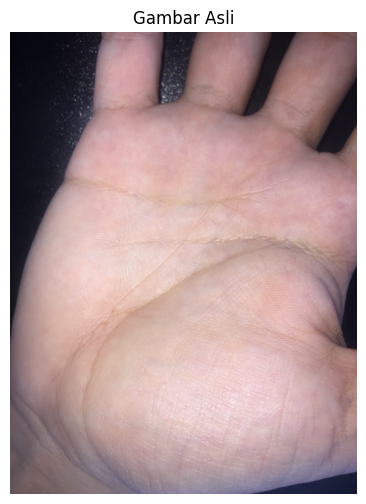

In [ ]:
# Path ke direktori hasil ekstraksi
extract_dir = "/root/.cache/kagglehub/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd/versions/1"

#Nama folder utama adalah 'Sapienza University Mobile Palmprint Database(SMPD)'
image_folder = os.path.join(extract_dir, 'Sapienza University Mobile Palmprint Database(SMPD)')

# Ambil nama sub-folder (folder subjek) terlebih dahulu
# Misalnya, kita ambil folder subjek pertama yang ditemukan, contohnya '008' atau '001'
subject_folder_name = os.listdir(image_folder)[0]
subject_path = os.path.join(image_folder, subject_folder_name)
print(f"Masuk ke folder subjek: {subject_path}")

# Sekarang, ambil nama file gambar dari DALAM folder subjek
# Kita ambil file gambar pertama di dalam folder subjek tersebut
sample_image_name = os.listdir(subject_path)[0]
sample_image_path = os.path.join(subject_path, sample_image_name)

print(f"Mencoba memuat gambar: {sample_image_path}")

# Lakukan pengecekan file
if not os.path.exists(sample_image_path):
    print(f"Error: File tidak ditemukan di {sample_image_path}")
else:
    # Muat gambar menggunakan OpenCV
    image = cv2.imread(sample_image_path)

    if image is None:
        print(f"Error: Tidak dapat memuat gambar dari {sample_image_path}.")
    else:
        # Konversi warna dari BGR ke RGB untuk ditampilkan
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Tampilkan gambar sampel
        print(f"Berhasil! Menampilkan gambar sampel: {sample_image_name}")
        plt.figure(figsize=(6, 6))
        plt.imshow(image_rgb)
        plt.title('Gambar Asli')
        plt.axis('off')
        plt.show()


## Tahap 2: Pra-Proses

## Tahap 2.1: Binarisasi Gambar

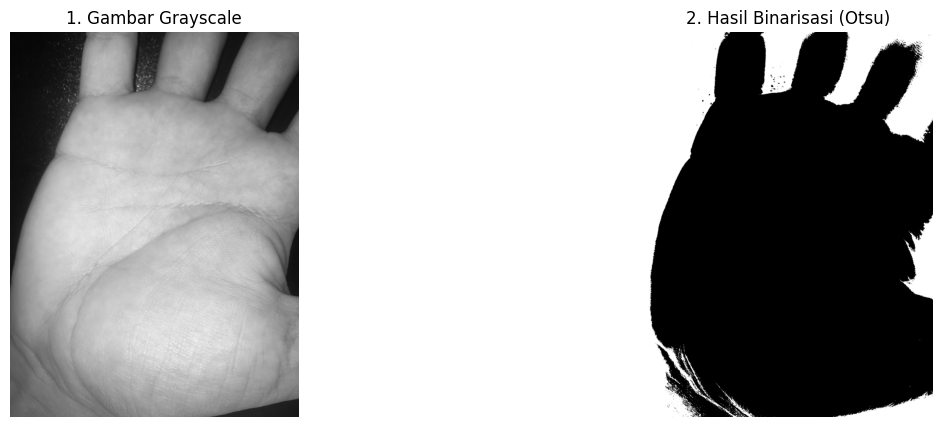

In [ ]:
# Pastikan variabel 'image' dari langkah sebelumnya sudah ada

# Langkah 1: Ubah gambar asli menjadi grayscale (skala abu-abu)
# Proses binarisasi bekerja pada gambar dengan satu channel warna.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Langkah 2: Terapkan Otsu's Thresholding
# cv2.THRESH_BINARY_INV akan membuat telapak tangan menjadi putih dan background menjadi hitam.
# cv2.THRESH_OTSU akan mengaktifkan metode Otsu untuk menemukan threshold terbaik secara otomatis.
ret, thresh_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tampilkan ketiga gambar untuk perbandingan
plt.figure(figsize=(15, 5))

# Gambar Grayscale
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('1. Gambar Grayscale')
plt.axis('off')

# Gambar Hasil Binarisasi (Threshold)
plt.subplot(1, 2, 2)
plt.imshow(thresh_image, cmap='gray')
plt.title('2. Hasil Binarisasi (Otsu)')
plt.axis('off')

plt.show()

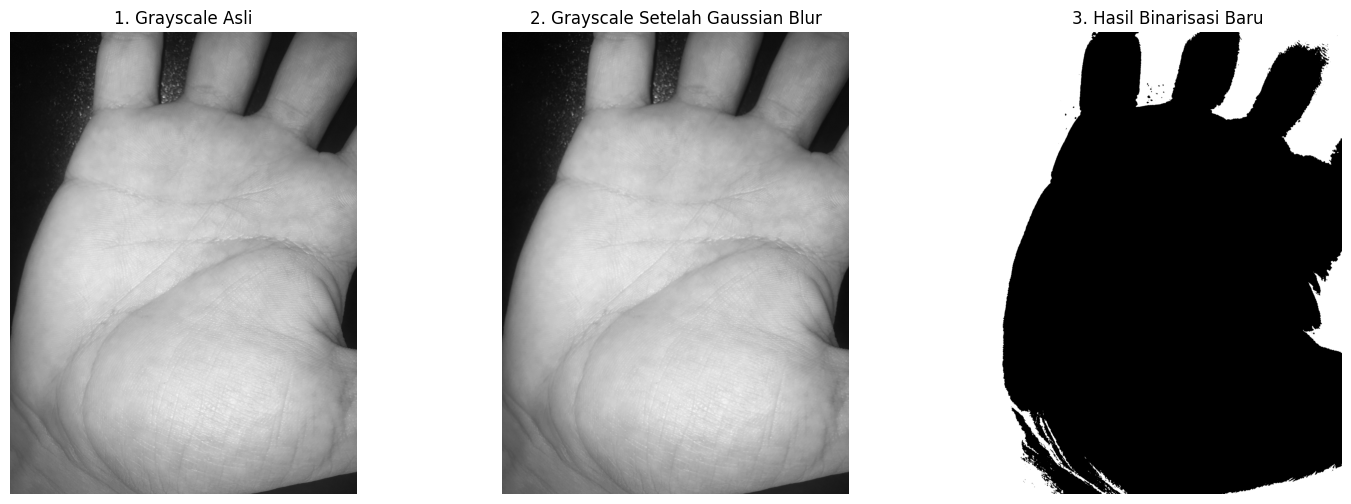

In [ ]:
# Pastikan variabel 'gray_image' dari langkah sebelumnya sudah ada

# Langkah 1: Terapkan Gaussian Blur pada gambar grayscale
# Angka (7, 7) adalah ukuran kernel blur, harus ganjil. Semakin besar angkanya, semakin blur gambarnya.
# Angka 0 adalah standar deviasi sigmaX, OpenCV akan menghitungnya secara otomatis jika 0.
blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)

# Langkah 2: Terapkan Otsu's Thresholding pada gambar yang sudah di-blur
ret, thresh_image_new = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tampilkan ketiga gambar untuk perbandingan
plt.figure(figsize=(18, 6))

# Gambar Grayscale Asli
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('1. Grayscale Asli')
plt.axis('off')

# Gambar Setelah di-Blur
plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('2. Grayscale Setelah Gaussian Blur')
plt.axis('off')

# Gambar Hasil Binarisasi Baru
plt.subplot(1, 3, 3)
plt.imshow(thresh_image_new, cmap='gray')
plt.title('3. Hasil Binarisasi Baru')
plt.axis('off')

plt.show()

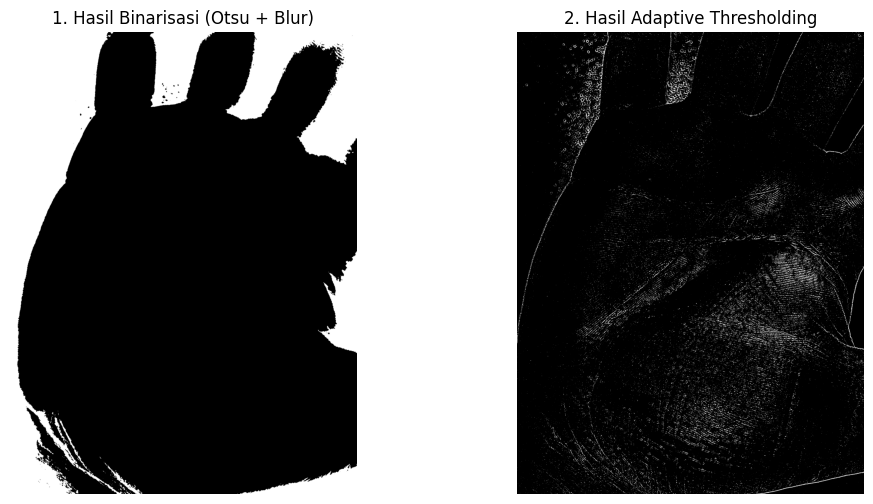

In [ ]:
# Pastikan variabel 'blurred_image' dari langkah sebelumnya sudah ada

# Terapkan Adaptive Thresholding
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C: Metode thresholding yang lebih canggih, biasanya memberikan hasil yang lebih baik.
# cv2.THRESH_BINARY_INV: Membuat telapak tangan menjadi putih dan background hitam.
# 11: Ukuran blok piksel tetangga untuk menghitung nilai threshold (harus ganjil).
# 2: Konstanta C yang dikurangkan dari rata-rata atau rata-rata terbobat.
adaptive_thresh_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY_INV, 11, 2)

# Tampilkan hasil untuk perbandingan
plt.figure(figsize=(12, 6))

# Hasil Otsu sebelumnya
plt.subplot(1, 2, 1)
plt.imshow(thresh_image_new, cmap='gray')
plt.title('1. Hasil Binarisasi (Otsu + Blur)')
plt.axis('off')

# Hasil Adaptive Thresholding
plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresh_image, cmap='gray')
plt.title('2. Hasil Adaptive Thresholding')
plt.axis('off')

plt.show()

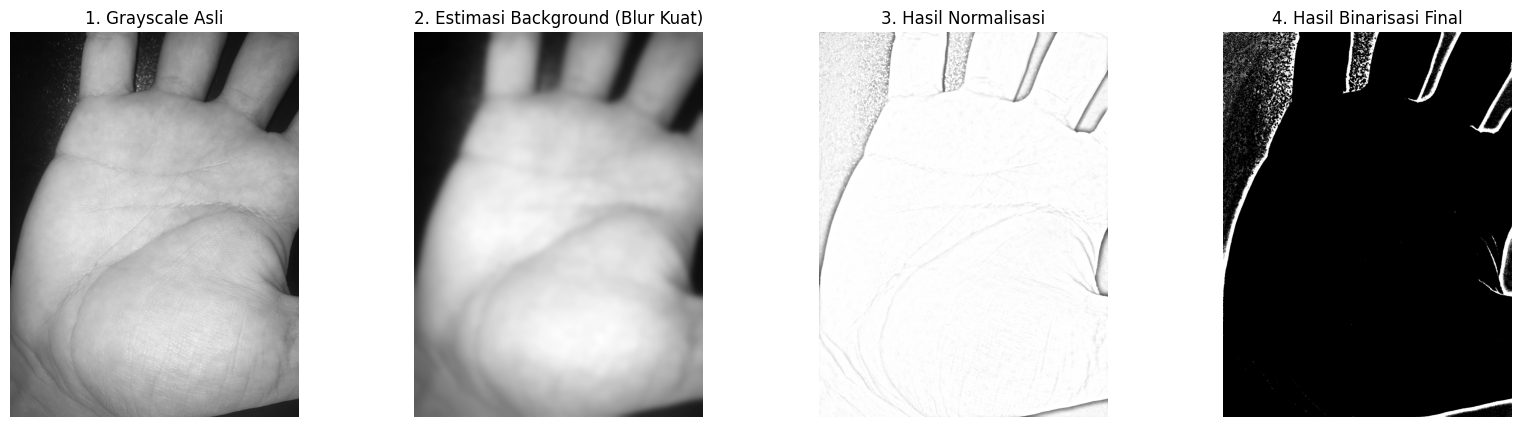

In [ ]:
# Pastikan variabel 'gray_image' dari langkah awal sudah ada

# Langkah 1: Buat estimasi background dengan Gaussian Blur yang sangat kuat
# Kernel size harus besar dan ganjil, misalnya 151x151
background = cv2.GaussianBlur(gray_image, (151, 151), 0)

# Langkah 2: Lakukan normalisasi dengan membagi gambar grayscale dengan background-nya
# cv2.divide menormalkan kecerahan gambar.
normalized_image = cv2.divide(gray_image, background, scale=255)

# Langkah 3: Terapkan Otsu's Binarization pada gambar yang sudah dinormalisasi
ret, final_thresh_image = cv2.threshold(normalized_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tampilkan semua langkah untuk pemahaman yang jelas
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('1. Grayscale Asli')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(background, cmap='gray')
plt.title('2. Estimasi Background (Blur Kuat)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(normalized_image, cmap='gray')
plt.title('3. Hasil Normalisasi')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(final_thresh_image, cmap='gray')
plt.title('4. Hasil Binarisasi Final')
plt.axis('off')

plt.show()

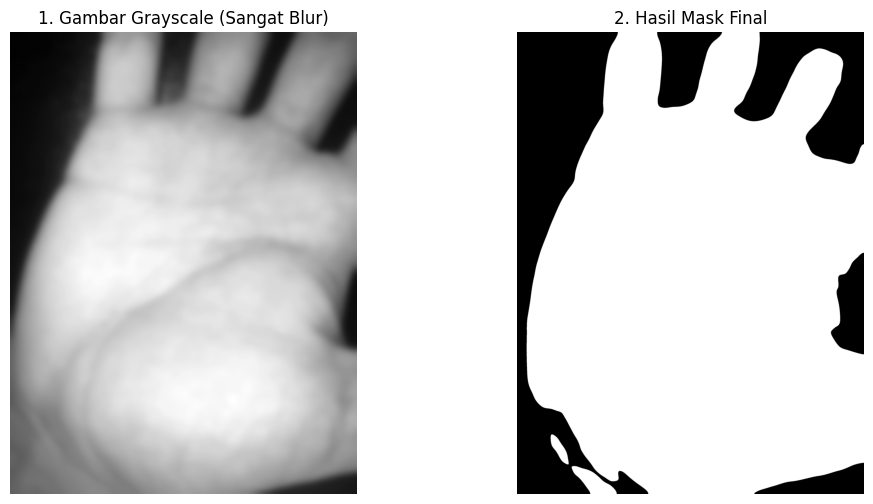

In [ ]:
# Langkah 1: Buat versi gambar yang sangat blur (sama seperti sebelumnya)
# Ini akan menjadi dasar kita untuk membuat mask.
blurred_image = cv2.GaussianBlur(gray_image, (151, 151), 0)

# Langkah 2: Terapkan Otsu's Thresholding LANGSUNG pada gambar yang sudah di-blur
# Kali ini kita gunakan THRESH_BINARY (bukan INV) karena area tangan pada gambar blur lebih terang daripada background.
ret, final_mask = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tampilkan hasilnya
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title('1. Gambar Grayscale (Sangat Blur)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_mask, cmap='gray')
plt.title('2. Hasil Mask Final')
plt.axis('off')

plt.show()

Tahap 2.2: Menemukan Kontur

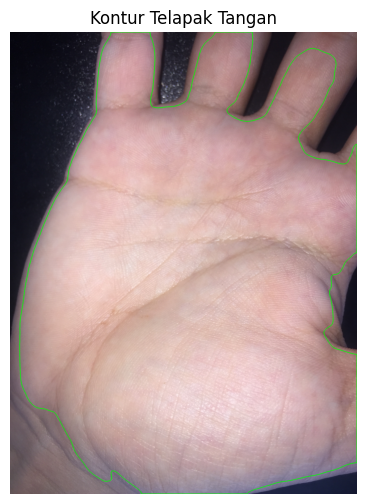

In [ ]:
# Pastikan variabel 'final_mask' (hasil binarisasi) dan 'image' (gambar asli) sudah ada

# Cari kontur pada gambar mask.
# cv2.RETR_EXTERNAL hanya akan mengambil kontur paling luar (outline tangan).
# cv2.CHAIN_APPROX_SIMPLE akan menyederhanakan kontur untuk menghemat memori.
contours, hierarchy = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Untuk memastikan kita hanya mendapatkan kontur telapak tangan (jika ada noise kecil),
# kita pilih kontur dengan area terbesar.
if contours:
    hand_contour = max(contours, key=cv2.contourArea)

    # Buat salinan dari gambar asli untuk digambari kontur
    contour_image = image.copy()

    # Gambar kontur yang ditemukan pada gambar asli
    # Parameter: gambar tujuan, [kontur], indeks kontur (-1 untuk semua), warna (hijau), ketebalan
    cv2.drawContours(contour_image, [hand_contour], -1, (0, 255, 0), 3)

    # Konversi ke RGB untuk ditampilkan dengan matplotlib
    contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

    # Tampilkan hasilnya
    plt.figure(figsize=(6, 6))
    plt.imshow(contour_image_rgb)
    plt.title('Kontur Telapak Tangan')
    plt.axis('off')
    plt.show()
else:
    print("Tidak ada kontur yang ditemukan.")

## Tahap 2.3: Mendeteksi Titik Kunci (Keypoints)

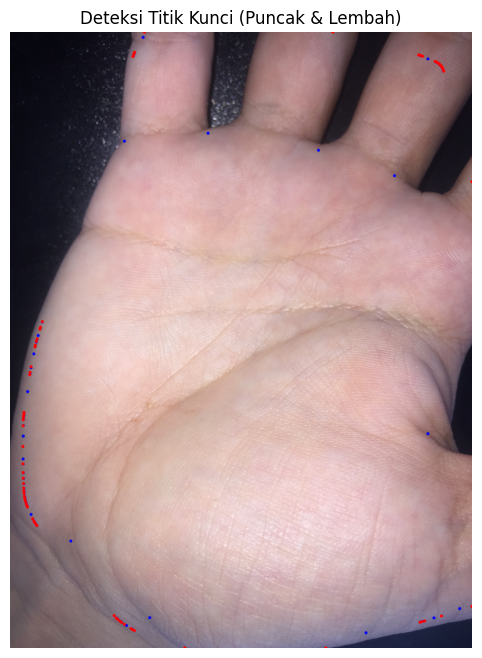

Ditemukan 74 titik puncak (merah) dan 72 titik lembah (biru).


In [ ]:
import numpy as np

# Pastikan variabel 'hand_contour' dan 'image' sudah ada dari langkah sebelumnya

# --- Menemukan Lembah Antar Jari (Valleys) ---

# Hitung Convex Hull dari kontur tangan
hull_indices = cv2.convexHull(hand_contour, returnPoints=False)
defects = cv2.convexityDefects(hand_contour, hull_indices)

# Buat salinan gambar untuk menggambar titik-titik
keypoints_image = image.copy()
valley_points = []

if defects is not None:
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]
        # s: indeks titik awal, e: indeks titik akhir, f: indeks titik terjauh (lembah)
        far = tuple(hand_contour[f][0])

        # Gambar lingkaran biru pada setiap titik lembah yang terdeteksi
        cv2.circle(keypoints_image, far, 8, [255, 0, 0], -1) # Biru untuk lembah
        valley_points.append(far)

# --- Menemukan Puncak Jari (Fingertips) ---

# Puncak jari adalah titik-titik pada convex hull.
# Kita akan menggambar titik-titik ini untuk melihatnya.
# Ambil titik-titik dari hand_contour menggunakan hull_indices
hull_points_coords = [tuple(hand_contour[i][0]) for i in hull_indices.flatten()]


for point_coords in hull_points_coords:
    # Gambar lingkaran merah pada setiap titik puncak jari
    cv2.circle(keypoints_image, point_coords, 8, [0, 0, 255], -1) # Merah untuk puncak


# Konversi ke RGB dan tampilkan hasilnya
keypoints_image_rgb = cv2.cvtColor(keypoints_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(keypoints_image_rgb)
plt.title('Deteksi Titik Kunci (Puncak & Lembah)')
plt.axis('off')
plt.show()

print(f"Ditemukan {len(hull_points_coords)} titik puncak (merah) dan {len(valley_points)} titik lembah (biru).")

## Tahap 2.4: Memfilter Titik Kunci dan Menentukan ROI

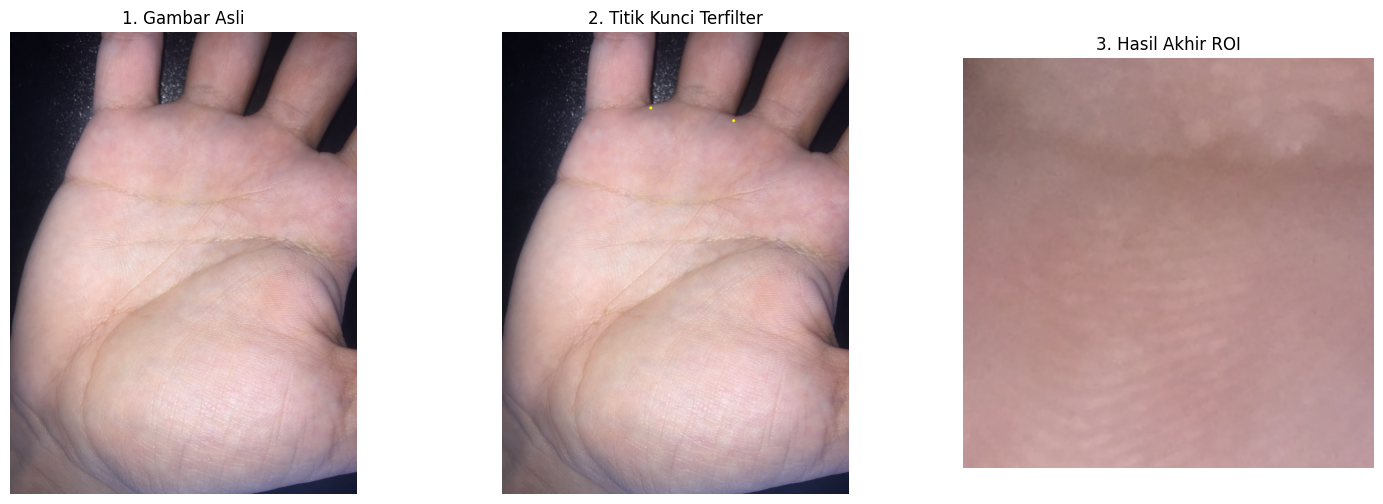

In [ ]:
import math

# Pastikan variabel 'defects', 'hand_contour', dan 'image'
# sudah ada dari hasil eksekusi kode Anda sebelumnya.

# --- Filter Lembah Berdasarkan Sudut dan Jarak ---
filtered_valleys = []
if defects is not None:
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]
        start = tuple(hand_contour[s][0])
        end = tuple(hand_contour[e][0])
        far = tuple(hand_contour[f][0])

        # Hitung panjang sisi segitiga
        a = math.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
        b = math.sqrt((far[0] - start[0])**2 + (far[1] - start[1])**2)
        c = math.sqrt((end[0] - far[0])**2 + (end[1] - far[1])**2)

        # Hitung sudut menggunakan hukum cosinus
        # Kita tambahkan penanganan error untuk menghindari domain error jika nilai acos di luar [-1, 1]
        cosine_value = (b**2 + c**2 - a**2) / (2*b*c)
        angle = math.acos(max(-1, min(1, cosine_value))) * 180 / math.pi

        # PERBAIKAN: Sesuaikan syarat jarak (d) dan tambahkan filter y-coordinate
        height, width, _ = image.shape
        if angle < 90 and d > 250 and far[1] < height / 2:
            filtered_valleys.append(far)

# --- Pilih Dua Titik Lembah Utama ---
# Urutkan berdasarkan posisi vertikal (nilai y terkecil = paling atas)
filtered_valleys.sort(key=lambda point: point[1])
# Ambil dua titik teratas
key_valleys = filtered_valleys[:2]

# Gambar titik-titik kunci yang sudah difilter
filtered_image = image.copy()
for point in key_valleys:
    cv2.circle(filtered_image, point, 10, [0, 255, 255], -1) # Kuning untuk titik kunci

# --- Ekstrak Region of Interest (ROI) ---
if len(key_valleys) == 2:
    # Tentukan titik acuan p1 dan p2, pastikan urut dari kiri ke kanan
    key_valleys.sort(key=lambda point: point[0])
    p1, p2 = key_valleys[0], key_valleys[1]

    # Hitung titik tengah dan sudut antara dua lembah
    midpoint_x = int((p1[0] + p2[0]) // 2)
    midpoint_y = int((p1[1] + p2[1]) // 2)
    midpoint = (midpoint_x, midpoint_y)

    angle = math.atan2(p2[1] - p1[1], p2[0] - p1[0]) * 180 / math.pi

    # Tentukan ukuran ROI (bisa disesuaikan)
    roi_size = 256

    # Dapatkan matriks rotasi untuk meluruskan gambar
    rot_mat = cv2.getRotationMatrix2D(midpoint, angle, 1.0)
    # Terapkan rotasi pada gambar asli
    rotated_image = cv2.warpAffine(image, rot_mat, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC)

    # Titik tengah sekarang berada di lokasi baru pada gambar yang dirotasi
    # Kita perlu menghitung ulang posisi midpoint setelah rotasi
    midpoint_rotated = np.dot(rot_mat, [midpoint[0], midpoint[1], 1])

    # Ambil ROI dari gambar yang sudah diluruskan
    x_rot, y_rot = int(midpoint_rotated[0]), int(midpoint_rotated[1])
    roi_x_start, roi_y_start = int(x_rot - roi_size/2), int(y_rot - roi_size/2)

    # Pastikan ROI berada di dalam batas gambar setelah rotasi
    if roi_y_start >= 0 and roi_x_start >= 0 and roi_y_start + roi_size <= rotated_image.shape[0] and roi_x_start + roi_size <= rotated_image.shape[1]:
        roi = rotated_image[roi_y_start : roi_y_start + roi_size, roi_x_start : roi_x_start + roi_size]

        # Tampilkan Hasil
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('1. Gambar Asli')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        plt.title('2. Titik Kunci Terfilter')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.title('3. Hasil Akhir ROI')
        plt.axis('off')

        plt.show()

    else:
        print("ROI berada di luar batas gambar setelah rotasi. Coba sesuaikan ukuran ROI atau filter.")

else:
    print(f"Tidak cukup titik lembah ditemukan setelah filtering. Hanya {len(filtered_valleys)} kandidat ditemukan.")

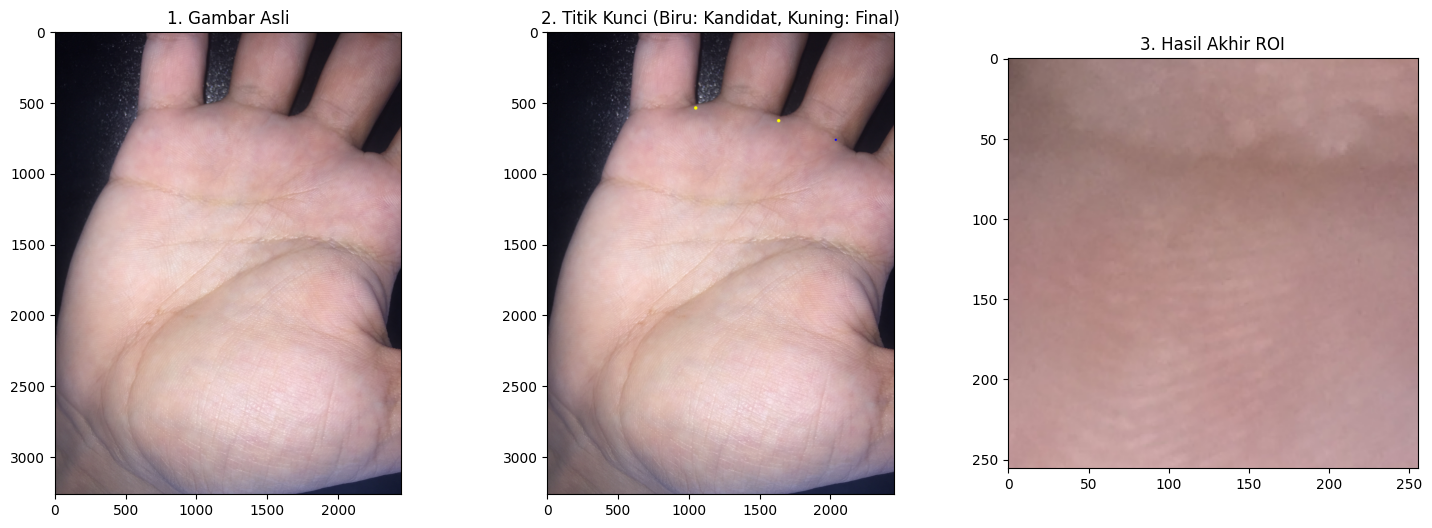

In [ ]:
# --- Filter Lembah dengan Kriteria yang Lebih Longgar ---
filtered_valleys = []
if defects is not None:
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]
        start = tuple(hand_contour[s][0])
        end = tuple(hand_contour[e][0])
        far = tuple(hand_contour[f][0])

        a = math.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
        b = math.sqrt((far[0] - start[0])**2 + (far[1] - start[1])**2)
        c = math.sqrt((end[0] - far[0])**2 + (end[1] - far[1])**2)

        cosine_value = (b**2 + c**2 - a**2) / (2*b*c)
        angle = math.acos(max(-1, min(1, cosine_value))) * 180 / math.pi

        # PERBAIKAN: Turunkan syarat jarak (d) secara signifikan.
        # Kita juga filter berdasarkan posisi y (hanya ambil bagian atas tangan).
        height, width, _ = image.shape
        if angle < 90 and d > 250 and far[1] < height / 2:
            filtered_valleys.append(far)

# --- Pilih Dua Titik Lembah Utama ---
# Jika ada beberapa kandidat, pilih dua yang paling atas.
if len(filtered_valleys) >= 2:
    filtered_valleys.sort(key=lambda point: point[1])
    key_valleys = filtered_valleys[:2]

    # Gambar titik-titik kunci yang sudah difilter
    filtered_image = image.copy()
    for point in filtered_valleys: # Tampilkan semua kandidat
        cv2.circle(filtered_image, point, 8, [255, 0, 0], -1) # Biru untuk kandidat
    for point in key_valleys: # Tampilkan pilihan final
        cv2.circle(filtered_image, point, 12, [0, 255, 255], -1) # Kuning untuk final

    # --- Ekstrak Region of Interest (ROI) ---
    key_valleys.sort(key=lambda point: point[0])
    p1, p2 = key_valleys[0], key_valleys[1]

    # Calculate midpoint and ensure coordinates are standard integers
    midpoint_x = int((p1[0] + p2[0]) // 2)
    midpoint_y = int((p1[1] + p2[1]) // 2)
    midpoint = (midpoint_x, midpoint_y)

    angle = math.atan2(p2[1] - p1[1], p2[0] - p1[0]) * 180 / math.pi

    roi_size = 256

    rot_mat = cv2.getRotationMatrix2D(midpoint, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rot_mat, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC)

    # Calculate the rotated midpoint coordinates. The result is a NumPy array,
    # convert to integers for slicing.
    midpoint_rotated = np.dot(rot_mat, [midpoint[0], midpoint[1], 1])

    x_rot, y_rot = int(midpoint_rotated[0]), int(midpoint_rotated[1])
    roi_x_start, roi_y_start = int(x_rot - roi_size/2), int(y_rot - roi_size/2)

    # Pastikan ROI tidak keluar dari batas gambar
    if roi_y_start >= 0 and roi_x_start >= 0 and roi_y_start + roi_size < rotated_image.shape[0] and roi_x_start + roi_size < rotated_image.shape[1]:
        roi = rotated_image[roi_y_start : roi_y_start + roi_size, roi_x_start : roi_x_start + roi_size]

        # Tampilkan Hasil
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('1. Gambar Asli')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        plt.title('2. Titik Kunci (Biru: Kandidat, Kuning: Final)')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.title('3. Hasil Akhir ROI')

        plt.show()
    else:
        print("ROI berada di luar batas gambar. Coba sesuaikan ukuran ROI atau filter.")

else:
    print(f"Tidak cukup titik lembah ditemukan. Hanya ada {len(filtered_valleys)} kandidat. Coba longgarkan lagi kriteria filter.")

--- Data Diagnostik Semua Titik Lembah ---
Titik: (np.int32(1049), np.int32(536)), Sudut: 83.12 derajat, Jarak: 536.00 piksel
Titik: (np.int32(705), np.int32(28)), Sudut: 164.37 derajat, Jarak: 5.94 piksel
Titik: (np.int32(660), np.int32(109)), Sudut: 149.04 derajat, Jarak: 0.79 piksel
Titik: (np.int32(657), np.int32(116)), Sudut: 146.31 derajat, Jarak: 0.74 piksel
Titik: (np.int32(653), np.int32(127)), Sudut: 160.35 derajat, Jarak: 0.86 piksel
Titik: (np.int32(606), np.int32(578)), Sudut: 161.27 derajat, Jarak: 102.35 piksel
Titik: (np.int32(171), np.int32(1536)), Sudut: 160.35 derajat, Jarak: 0.63 piksel
Titik: (np.int32(161), np.int32(1567)), Sudut: 156.80 derajat, Jarak: 0.86 piksel
Titik: (np.int32(149), np.int32(1608)), Sudut: 175.39 derajat, Jarak: 0.96 piksel
Titik: (np.int32(143), np.int32(1628)), Sudut: 160.02 derajat, Jarak: 0.82 piksel
Titik: (np.int32(139), np.int32(1642)), Sudut: 163.61 derajat, Jarak: 0.73 piksel
Titik: (np.int32(134), np.int32(1663)), Sudut: 158.20 dera

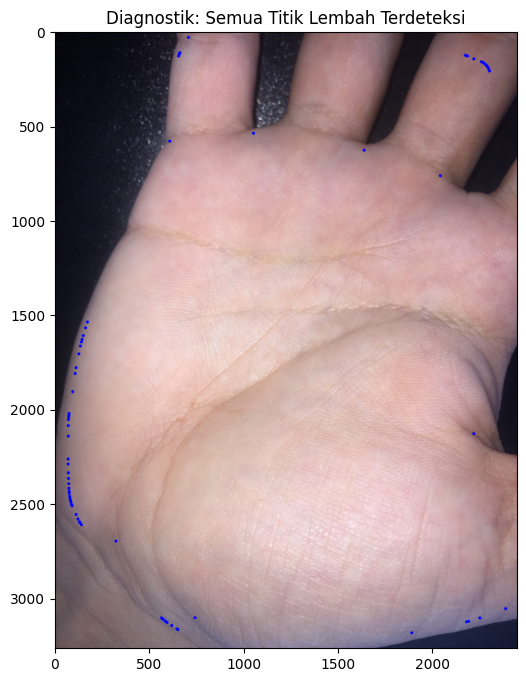

In [ ]:
diagnostic_image = image.copy()
print("--- Data Diagnostik Semua Titik Lembah ---")

if defects is not None:
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]
        start = tuple(hand_contour[s][0])
        end = tuple(hand_contour[e][0])
        far = tuple(hand_contour[f][0])

        a = math.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
        b = math.sqrt((far[0] - start[0])**2 + (far[1] - start[1])**2)
        c = math.sqrt((end[0] - far[0])**2 + (end[1] - far[1])**2)

        cosine_value = (b**2 + c**2 - a**2) / (2*b*c)
        angle = math.acos(max(-1, min(1, cosine_value))) * 180 / math.pi

        # Jarak 'd' dari convexityDefects perlu diskalakan dengan benar. Nilai aslinya adalah 256 * jarak.
        distance_from_hull = d / 256.0

        # Cetak data untuk setiap titik
        print(f"Titik: {far}, Sudut: {angle:.2f} derajat, Jarak: {distance_from_hull:.2f} piksel")

        # Gambar semua titik untuk visualisasi
        cv2.circle(diagnostic_image, far, 8, [255, 0, 0], -1)

# Tampilkan hasilnya
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(diagnostic_image, cv2.COLOR_BGR2RGB))
plt.title('Diagnostik: Semua Titik Lembah Terdeteksi')
plt.show()


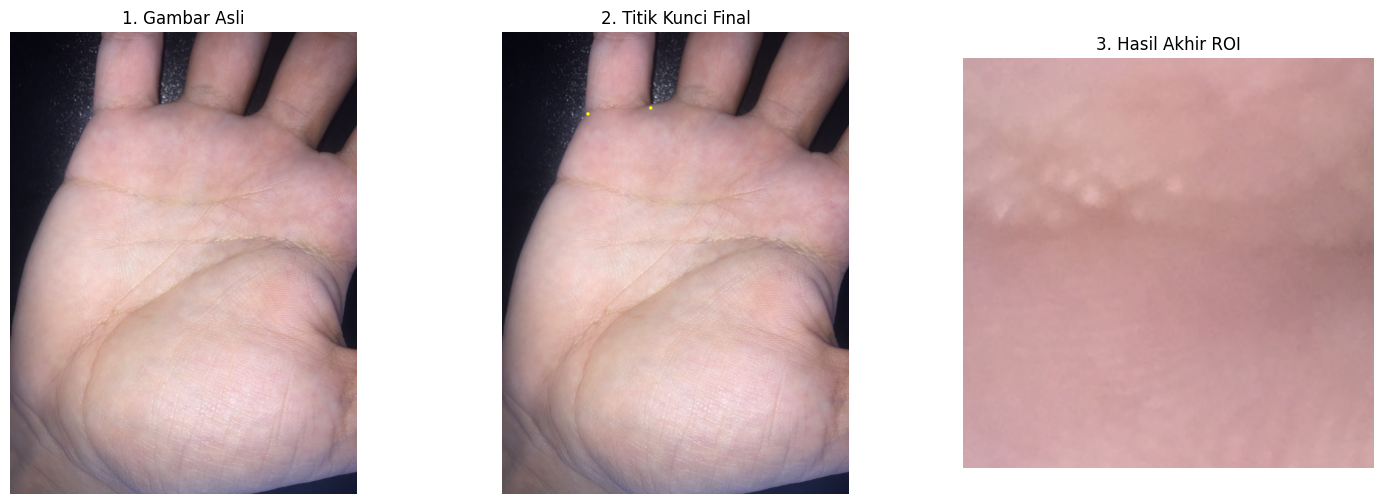

In [ ]:
# --- Filter Lembah Berdasarkan Jarak dari Data Diagnostik ---
filtered_valleys = []
if defects is not None:
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]
        far = tuple(hand_contour[f][0])
        distance_from_hull = d / 256.0

        # FILTER UTAMA: Ambil hanya titik yang jaraknya signifikan dari hull.
        if distance_from_hull > 100:
            filtered_valleys.append(far)

# --- Pilih Dua Titik Lembah Utama ---
# Jika ada beberapa kandidat, pilih dua yang paling atas.
if len(filtered_valleys) >= 2:
    filtered_valleys.sort(key=lambda point: point[1]) # Urutkan berdasarkan posisi y
    key_valleys = filtered_valleys[:2]

    # Gambar titik-titik kunci yang sudah difilter
    filtered_image = image.copy()
    for point in key_valleys:
        cv2.circle(filtered_image, point, 12, [0, 255, 255], -1) # Kuning untuk final

    # --- Ekstrak Region of Interest (ROI) ---
    key_valleys.sort(key=lambda point: point[0]) # Urutkan dari kiri ke kanan
    p1, p2 = key_valleys[0], key_valleys[1]

    # Calculate midpoint and ensure coordinates are standard integers
    midpoint_x = int((p1[0] + p2[0]) // 2)
    midpoint_y = int((p1[1] + p2[1]) // 2)
    midpoint = (midpoint_x, midpoint_y)

    angle = math.atan2(p2[1] - p1[1], p2[0] - p1[0]) * 180 / math.pi

    roi_size = 256

    rot_mat = cv2.getRotationMatrix2D(midpoint, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rot_mat, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC)

    # Calculate the rotated midpoint coordinates. The result is a NumPy array,
    # convert to integers for slicing.
    midpoint_rotated = np.dot(rot_mat, [midpoint[0], midpoint[1], 1])

    x_rot, y_rot = int(midpoint_rotated[0]), int(midpoint_rotated[1])
    roi_x_start, roi_y_start = int(x_rot - roi_size/2), int(y_rot - roi_size/2)

    if roi_y_start >= 0 and roi_x_start >= 0 and roi_y_start + roi_size < rotated_image.shape[0] and roi_x_start + roi_size < rotated_image.shape[1]:
        roi = rotated_image[roi_y_start : roi_y_start + roi_size, roi_x_start : roi_x_start + roi_size]

        # Tampilkan Hasil
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('1. Gambar Asli')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        plt.title('2. Titik Kunci Final')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.title('3. Hasil Akhir ROI')
        plt.axis('off')

        plt.show()
    else:
        print("ROI berada di luar batas gambar. Coba sesuaikan ukuran ROI.")

else:
    print(f"Filter gagal. Hanya {len(filtered_valleys)} kandidat ditemukan dengan jarak > 100. Coba turunkan nilai filter jarak.")

## Tahap 3: Ekstraksi Fitur (Feature Extraction)

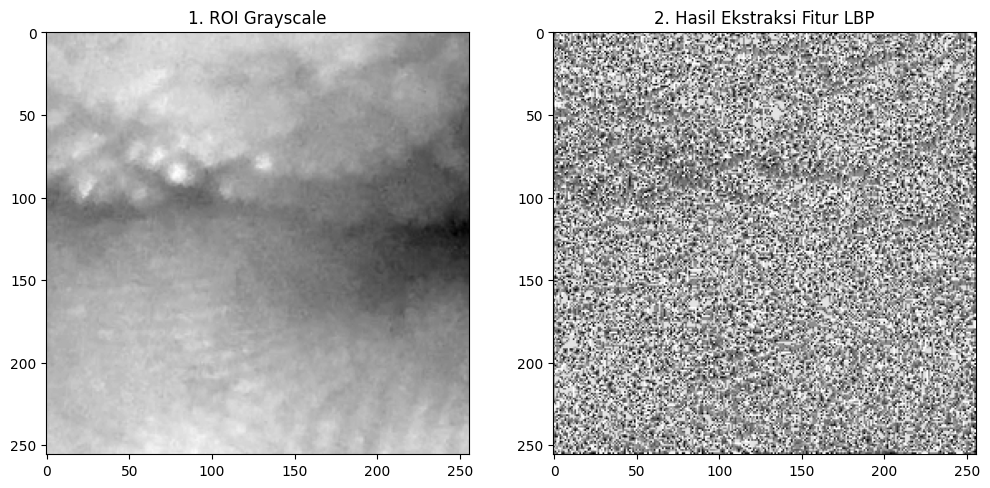

In [ ]:
from skimage.feature import local_binary_pattern
import numpy as np

# Pastikan variabel 'roi' (gambar hasil preprocessing) sudah ada.

# Langkah 1: Ubah ROI menjadi grayscale
roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Langkah 2: Terapkan Local Binary Pattern (LBP)
# P (points): jumlah titik tetangga (biasanya 8)
# R (radius): jarak titik tetangga dari pusat (biasanya 1)
P = 8
R = 1
lbp_image = local_binary_pattern(roi_gray, P, R, method="uniform")

# Tampilkan hasilnya
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(roi_gray, cmap='gray')
plt.title('1. ROI Grayscale')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title('2. Hasil Ekstraksi Fitur LBP')

plt.show()

## Tahap 3.1: Membuat Vektor Fitur dari Histogram LBP


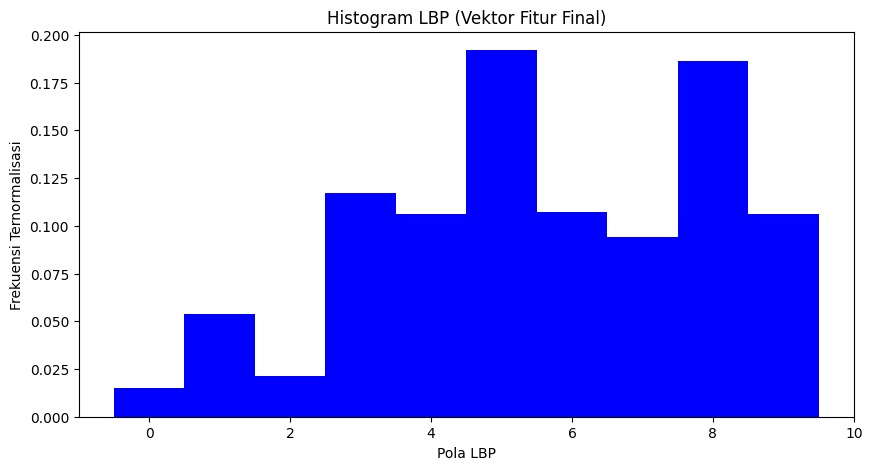

Vektor fitur berhasil dibuat!
Panjang Vektor Fitur: 10


In [ ]:
# Pastikan variabel 'lbp_image' sudah ada dari langkah sebelumnya.

# Hitung histogram dari gambar LBP.
# np.histogram akan menghitung frekuensi setiap nilai piksel.
# bins: jumlah 'wadah' untuk nilai piksel (untuk LBP 'uniform' ada P+2 bins).
# range: rentang nilai piksel yang dihitung.
P = 8
hist, _ = np.histogram(lbp_image.ravel(),
                       bins=np.arange(0, P + 3),
                       range=(0, P + 2))

# Normalisasi histogram agar total nilainya menjadi 1 (ini opsional tapi praktik yang baik)
hist = hist.astype("float")
hist /= (hist.sum() + 1e-6) # ditambahkan nilai kecil untuk menghindari pembagian dengan nol

# Vektor fitur Anda sudah siap di dalam variabel 'hist'
feature_vector = hist

# Mari kita tampilkan histogramnya untuk melihat vektor fitur secara visual
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_vector)), feature_vector, width=1.0, color='b')
plt.title('Histogram LBP (Vektor Fitur Final)')
plt.xlabel('Pola LBP')
plt.ylabel('Frekuensi Ternormalisasi')
plt.show()

print("Vektor fitur berhasil dibuat!")
print("Panjang Vektor Fitur:", len(feature_vector))

## Tahap 4: Pencocokan (Matching)

In [ ]:
import cv2
import numpy as np
import math
import os
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# --- BAGIAN 1: FUNGSI PIPELINE LENGKAP ---

def generate_feature_vector(image_path):
    """
    Loads an image, preprocesses it, extracts ROI, and generates an LBP feature vector.

    Args:
        image_path (str): The full path to the image file.

    Returns:
        np.ndarray: The normalized LBP histogram as a feature vector, or None if processing fails.
    """
    # 1. Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    # 2. Preprocessing (from previous successful steps)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (151, 151), 0)
    ret, final_mask = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3. Find Contour
    contours, hierarchy = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print(f"Error: No contours found in {image_path}")
        return None

    hand_contour = max(contours, key=cv2.contourArea)

    # 4. Find Keypoints (Valleys)
    hull_indices = cv2.convexHull(hand_contour, returnPoints=False)
    defects = cv2.convexityDefects(hand_contour, hull_indices)

    filtered_valleys = []
    if defects is not None:
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            far = tuple(hand_contour[f][0])
            distance_from_hull = d / 256.0 # Scale distance

            if distance_from_hull > 100: # Use the previously successful filter
                filtered_valleys.append(far)

    if len(filtered_valleys) < 2:
        print(f"Error: Not enough key valleys found in {image_path} after filtering.")
        # As a fallback, you might try with a lower threshold or skip this image
        return None

    # 5. Select Two Main Valleys and Extract ROI
    filtered_valleys.sort(key=lambda point: point[1]) # Sort by y-coordinate
    key_valleys = filtered_valleys[:2]

    key_valleys.sort(key=lambda point: point[0]) # Sort by x-coordinate
    p1, p2 = key_valleys[0], key_valleys[1]

    # Calculate midpoint and ENSURE COORDINATES ARE STANDARD INTEGERS
    midpoint_x = int((p1[0] + p2[0]) // 2)
    midpoint_y = int((p1[1] + p2[1]) // 2)
    midpoint = (midpoint_x, midpoint_y)


    angle = math.atan2(p2[1] - p1[1], p2[0] - p1[0]) * 180 / math.pi

    roi_size = 256 # Keep consistent ROI size

    # Ensure midpoint coordinates are standard integers for cv2.getRotationMatrix2D
    rot_mat = cv2.getRotationMatrix2D((int(midpoint[0]), int(midpoint[1])), angle, 1.0)
    rotated_image = cv2.warpAffine(image, rot_mat, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC)

    midpoint_rotated = np.dot(rot_mat, [midpoint[0], midpoint[1], 1])
    x_rot, y_rot = int(midpoint_rotated[0]), int(midpoint_rotated[1])
    roi_x_start, roi_y_start = int(x_rot - roi_size/2), int(y_rot - roi_size/2)

    # Ensure ROI is within image bounds
    if roi_y_start < 0 or roi_x_start < 0 or roi_y_start + roi_size > rotated_image.shape[0] or roi_x_start + roi_size > rotated_image.shape[1]:
        print(f"Error: Calculated ROI is out of bounds for {image_path}. Start: ({roi_x_start}, {roi_y_start}), Size: ({roi_size}, {roi_size}), Image Shape: {rotated_image.shape}")
        return None

    roi = rotated_image[roi_y_start : roi_y_start + roi_size, roi_x_start : roi_x_start + roi_size]

    # 6. Feature Extraction (LBP)
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    P = 8
    R = 1
    lbp_image = local_binary_pattern(roi_gray, P, R, method="uniform")

    # 7. Create Feature Vector (Histogram)
    hist, _ = np.histogram(lbp_image.ravel(),
                           bins=np.arange(0, P + 3),
                           range=(0, P + 2))

    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)

    return hist

In [ ]:
# Pastikan variabel 'image_folder' sudah didefinisikan dengan benar dari kode sebelumnya
# Jika belum, jalankan kembali bagian ini:
root_path = '/root/.cache/kagglehub/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd/versions/1'
dataset_folder_name = 'Sapienza University Mobile Palmprint Database(SMPD)'
image_folder = os.path.join(root_path, dataset_folder_name)


# Periksa isi folder untuk kedua subjek
print("--- Isi Folder untuk Subjek 008 ---")
# Tanda kutip penting karena nama folder mengandung spasi
!ls "{image_folder}/008"

print("\n--- Isi Folder untuk Subjek 009 ---")
!ls "{image_folder}/009"

--- Isi Folder untuk Subjek 008 ---
008_F_0.JPG  008_F_8.JPG   008_P_26.JPG   008_RF_14.JPG  008_RP_32.JPG
008_F_1.JPG  008_F_9.JPG   008_P_27.JPG   008_RF_15.JPG  008_RP_33.JPG
008_F_2.JPG  008_P_20.JPG  008_P_28.JPG   008_RF_16.JPG  008_RP_34.JPG
008_F_3.JPG  008_P_21.JPG  008_P_29.JPG   008_RF_17.JPG  008_RP_35.JPG
008_F_4.JPG  008_P_22.JPG  008_RF_10.JPG  008_RF_18.JPG  008_RP_36.JPG
008_F_5.JPG  008_P_23.JPG  008_RF_11.JPG  008_RF_19.JPG  008_RP_37.JPG
008_F_6.JPG  008_P_24.JPG  008_RF_12.JPG  008_RP_30.JPG  008_RP_38.JPG
008_F_7.JPG  008_P_25.JPG  008_RF_13.JPG  008_RP_31.JPG  008_RP_39.JPG

--- Isi Folder untuk Subjek 009 ---
009_F_0.JPG  009_F_8.JPG   009_P_26.JPG   009_RF_14.JPG  009_RP_32.JPG
009_F_1.JPG  009_F_9.JPG   009_P_27.JPG   009_RF_15.JPG  009_RP_33.JPG
009_F_2.JPG  009_P_20.JPG  009_P_28.JPG   009_RF_16.JPG  009_RP_34.JPG
009_F_3.JPG  009_P_21.JPG  009_P_29.JPG   009_RF_17.JPG  009_RP_35.JPG
009_F_4.JPG  009_P_22.JPG  009_RF_10.JPG  009_RF_18.JPG  009_RP_36.JPG
009_

In [ ]:
# --- BAGIAN 2: PROSES PENGUJIAN (TELAH DIPERBAIKI) ---

# Pastikan Anda sudah men-generate 'feature_vector' untuk gambar pertama
# Misal gambar pertama adalah '008_F_0.JPG'
root_path = '/root/.cache/kagglehub/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd/versions/1'
dataset_folder_name = 'Sapienza University Mobile Palmprint Database(SMPD)'
image_folder = os.path.join(root_path, dataset_folder_name)
path_asli = os.path.join(image_folder, '008', '008_F_0.JPG')
vector_asli = generate_feature_vector(path_asli)

# Tentukan file uji berdasarkan daftar file yang benar
path_sama = os.path.join(image_folder, '008', '008_F_1.JPG') # Gambar lain dari subjek 008
path_beda = os.path.join(image_folder, '009', '009_F_0.JPG') # Gambar dari subjek 009

print(f"Gambar Asli: {path_asli}")
print("Memproses gambar dari subjek yang SAMA...")
vector_sama = generate_feature_vector(path_sama)
print(f"Gambar Uji Sama: {path_sama}")

print("\nMemproses gambar dari subjek yang BEDA...")
vector_beda = generate_feature_vector(path_beda)
print(f"Gambar Uji Beda: {path_beda}")


# --- BAGIAN 3: MENGHITUNG JARAK (MATCHING) ---

def chi_square_distance(histA, histB, eps=1e-10):
    d = 0.5 * np.sum(((histA - histB) ** 2) / (histA + histB + eps))
    return d

if vector_asli is not None and vector_sama is not None and vector_beda is not None:
    jarak_sama = chi_square_distance(vector_asli, vector_sama)
    jarak_beda = chi_square_distance(vector_asli, vector_beda)

    print("\n--- HASIL PENCOCOKAN ---")
    print(f"Jarak ke gambar subjek SAMA: {jarak_sama:.4f}")
    print(f"Jarak ke gambar subjek BEDA: {jarak_beda:.4f}")

    if jarak_sama < 0.1 and jarak_beda > 0.1: # Threshold bisa disesuaikan
        print("\nKESIMPULAN: Sistem berhasil membedakan!")
    elif jarak_sama < jarak_beda:
        print("\nKESIMPULAN: Sistem berhasil! Jarak ke subjek yang sama lebih kecil.")
    else:
        print("\nKESIMPULAN: Sistem belum optimal. Jarak ke subjek yang sama lebih besar.")
else:
    print("\nSalah satu vektor fitur gagal dibuat, proses matching dibatalkan.")


Gambar Asli: /root/.cache/kagglehub/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd/versions/1/Sapienza University Mobile Palmprint Database(SMPD)/008/008_F_0.JPG
Memproses gambar dari subjek yang SAMA...
Gambar Uji Sama: /root/.cache/kagglehub/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd/versions/1/Sapienza University Mobile Palmprint Database(SMPD)/008/008_F_1.JPG

Memproses gambar dari subjek yang BEDA...
Gambar Uji Beda: /root/.cache/kagglehub/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd/versions/1/Sapienza University Mobile Palmprint Database(SMPD)/009/009_F_0.JPG

--- HASIL PENCOCOKAN ---
Jarak ke gambar subjek SAMA: 0.0007
Jarak ke gambar subjek BEDA: 0.0056

KESIMPULAN: Sistem berhasil! Jarak ke subjek yang sama lebih kecil.


In [ ]:
from google.colab import drive
# 1. Hubungkan ke Google Drive Anda
drive.mount('/content/drive')

# 2. Definisikan path input dan output
# Pastikan path image_folder Anda sudah benar
root_path = '/root/.cache/kagglehub/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd/versions/1'
dataset_folder_name = 'Sapienza University Mobile Palmprint Database(SMPD)'
image_folder = os.path.join(root_path, dataset_folder_name)

# Ini adalah folder di Google Drive Anda tempat ROI akan disimpan
output_folder = '/content/drive/MyDrive/processed_palm_rois'
os.makedirs(output_folder, exist_ok=True)
print(f"Hasil ROI akan disimpan di: {output_folder}")

# 3. Gunakan kembali fungsi pipeline Anda (tidak ada yang diubah)
def create_roi_from_path(image_path):
    # (Salin dan tempel fungsi create_roi_from_path yang sudah berhasil di sini)
    image = cv2.imread(image_path)
    if image is None: return None
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (151, 151), 0)
    _, final_mask = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours: return None
    hand_contour = max(contours, key=cv2.contourArea)
    hull_indices = cv2.convexHull(hand_contour, returnPoints=False)
    defects = cv2.convexityDefects(hand_contour, hull_indices)
    filtered_valleys = []
    if defects is not None:
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            far = tuple(hand_contour[f][0])
            distance_from_hull = d / 256.0
            if distance_from_hull > 100:
                filtered_valleys.append(far)
    if len(filtered_valleys) < 2: return None
    filtered_valleys.sort(key=lambda point: point[1])
    key_valleys = filtered_valleys[:2]
    key_valleys.sort(key=lambda point: point[0])
    p1, p2 = key_valleys[0], key_valleys[1]
    # Ensure midpoint coordinates are standard integers
    midpoint_x = int((p1[0] + p2[0]) // 2)
    midpoint_y = int((p1[1] + p2[1]) // 2)
    midpoint = (midpoint_x, midpoint_y)

    angle = math.atan2(p2[1] - p1[1], p2[0] - p1[0]) * 180 / math.pi
    roi_size = 256
    # Ensure midpoint coordinates are standard integers for cv2.getRotationMatrix2D
    rot_mat = cv2.getRotationMatrix2D((int(midpoint[0]), int(midpoint[1])), angle, 1.0)
    rotated_image = cv2.warpAffine(image, rot_mat, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC)
    midpoint_rotated = np.dot(rot_mat, [midpoint[0], midpoint[1], 1])
    x_rot, y_rot = int(midpoint_rotated[0]), int(midpoint_rotated[1])
    roi_x_start, roi_y_start = int(x_rot - roi_size/2), int(y_rot - roi_size/2)
    roi = rotated_image[roi_y_start : roi_y_start + roi_size, roi_x_start : roi_x_start + roi_size]

    # Pastikan ukuran ROI benar sebelum dikembalikan
    if roi.shape[0] == roi_size and roi.shape[1] == roi_size:
        return roi
    else:
        return None

# 4. Loop, proses, dan simpan setiap gambar
for subject_folder in tqdm(os.listdir(image_folder), desc="Processing and Saving Subjects"):
    subject_path = os.path.join(image_folder, subject_folder)
    if not os.path.isdir(subject_path): continue

    # Buat sub-folder di Google Drive untuk setiap subjek
    output_subject_folder = os.path.join(output_folder, subject_folder)
    os.makedirs(output_subject_folder, exist_ok=True)

    for image_name in os.listdir(subject_path):
        image_path = os.path.join(subject_path, image_name)
        roi = create_roi_from_path(image_path)

        if roi is not None:
            # Simpan ROI sebagai file baru di Google Drive
            output_path = os.path.join(output_subject_folder, image_name)
            cv2.imwrite(output_path, roi)

print("\nSemua ROI berhasil diproses dan disimpan ke Google Drive!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Hasil ROI akan disimpan di: /content/drive/MyDrive/processed_palm_rois


Processing and Saving Subjects: 100%|██████████| 92/92 [57:58<00:00, 37.80s/it]


Semua ROI berhasil diproses dan disimpan ke Google Drive!
